In [3]:
#Overview of Challenge: 
#
#Challenge
#In tmdb_5000_movies.csv you’ll find the top movies as listed by https://www.themoviedb.org/
#(https://www.themoviedb.org/). Read in the file and then:
#1. Produce a summary of the dataset - size/shape, column headers, unique values etc.
#2. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your
#observations.
#3. Self led exploration - Do any data exploration you think would be of interest and create visualisations that show your
#work and support observations.
#4. Create your own top 250 - Use the formula below to create a new top 250 and check if where it maps with the
#ranking in the database provided(source https://en.wikipedia.org/wiki/IMDb#Rankings (https://en.wikipedia.org
#/wiki/IMDb#Rankings)):
#
#Where:
#W = weighted rating
#R = average rating for the movie as a number from 1 to 10 (vote_average)
#v = number of votes for the movie (vote_count)
#m = minimum votes required to be listed in the Top 250 (currently 25,000)
#C = the mean vote across the whole report

In [17]:
#Overview of Scripts
##Imports
##Read CSV
##Challenge 1
##Challenge 2
##Challenge 3
##Challenge 4

In [18]:
# Imports 
import os
import pandas as pd

In [19]:
# Check CSV file titled "IMDB_500_Movies.csv" & then read file
cwd = os.getcwd()
csvPath = cwd + "/IMDB_500_Movies.csv"
try:
    rawData = pd.read_csv(csvPath)
except FileNotFoundError:
    raise FileNotFoundError("Attempted to read the file: "+csvPath +"\n The file was not found. Please check the csv is named correctly (IMDB_500_Movies.csv) and in the root directory of this script!")

In [20]:
# Generate DataFrame using Pandas
df = pd.DataFrame(rawData)

In [21]:
#Challenge 1. Produce a summary of the dataset - size/shape, column headers, unique values etc.
## Using Pandas create Generic Info Overview of DataFrame
## this data provides the RangeIndex (number of enteries)
## and the Data columns (number of columns)
## it also gives generic data type information and the number of non-null datapoints for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [22]:
#Challenge 1cont. Produce a summary of the dataset - size/shape, column headers, unique values etc.
## The above cell seems against the intention of the question, so below is a recreation of this data in my own methods
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
dat_types = df.dtypes #gives both name of column and datatypes

print("Row count:\n{}\n".format(count_row))
print("Column count:\n{}\n".format(count_col))
print("Data types:\n{}\n".format(dat_types))



Row count:
10866

Column count:
21

Data types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object



In [31]:
#Challenge 2. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your observations.
## Using Pandas, create description that gives more statistics on DataFrame
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04   
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07   
std      575.619058      0.935142     12.8

In [24]:
#Challenge 2cont. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your observations.
## Again, the above cell seems against the intention of the question, so below is a recreation of this data in my own methods
## List key points of interest (poi)
poi = ['id','popularity','budget','revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']

##Loop over points of interest
for val in poi:
    coldata = df[val]

    num  = coldata.count()
    mean =  round(coldata.mean(),1)
    min  = coldata.min()
    max  = coldata.max()
    std  = round(coldata.std(),1)
    
    print("Column Name: {}\tCount:{}\tMean:{}\tMin:{}\tMax:{}\tStd:{}".format(val,num,mean,min,max,std))

Column Name: id	Count:10866	Mean:66064.2	Min:5	Max:417859	Std:92130.1
Column Name: popularity	Count:10866	Mean:0.6	Min:6.500000000000001e-05	Max:32.985763	Std:1.0
Column Name: budget	Count:10866	Mean:14625701.1	Min:0	Max:425000000	Std:30913213.8
Column Name: revenue	Count:10866	Mean:39823319.8	Min:0	Max:2781505847	Std:117003486.6
Column Name: runtime	Count:10866	Mean:102.1	Min:0	Max:900	Std:31.4
Column Name: vote_count	Count:10866	Mean:217.4	Min:10	Max:9767	Std:575.6
Column Name: vote_average	Count:10866	Mean:6.0	Min:1.5	Max:9.2	Std:0.9
Column Name: release_year	Count:10866	Mean:2001.3	Min:1960	Max:2015	Std:12.8
Column Name: budget_adj	Count:10866	Mean:17551039.8	Min:0.0	Max:425000000.0	Std:34306155.7
Column Name: revenue_adj	Count:10866	Mean:51364363.3	Min:0.0	Max:2827123750.0	Std:144632485.0


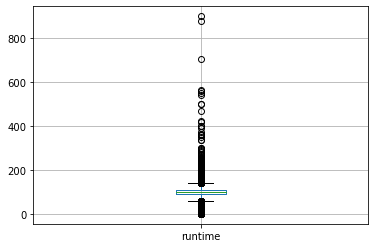

In [25]:
#Challenge 2cont.
## Plot and find outliers for runtime
bp = df.boxplot(column = ['runtime'])

In [26]:
# Challenge 2cont.
## From the boxplot above it seems that there are many movies that are not populated correctly
print("Number of movies with 0 mins runtime: {}".format(df[df.runtime == df.runtime.min()].id.count()))
print("Number of movies with 0 budget:  {}".format(df[df.budget == df.budget.min()].id.count()))
print("Number of movies with 0 revenue: {}".format(df[df.revenue == df.revenue.min()].id.count()))

## Thats alot of movies with 0 budget or revenue
## Do the same movies had adjusted budgets/revenues?
qry_budget  = df[df.budget == df.budget.min()]
qry_revenue = df[df.revenue == df.revenue.min()]

all_broken_budget = qry_budget[qry_budget.budget_adj == 0].id.count() == qry_budget.id.count()
print("All movies with 0 budget have 0 adjusted budjet: {}".format(all_broken_budget))

#broken_budget_revenue = qry_budget[qry_budget.id == qry_revenue.id]
broken_budget_revenue = pd.merge(qry_budget,qry_revenue, on=["id"], right_index=True)
print("number of movies with broken budget and revenue: {}".format(broken_budget_revenue.id.count()))

Number of movies with 0 mins runtime: 31
Number of movies with 0 budget:  5696
Number of movies with 0 revenue: 6016
All movies with 0 budget have 0 adjusted budjet: True
number of movies with broken budget and revenue: 4701


In [27]:
#Challenge 3. Self led exploration - Do any data exploration you think would be of interest and create visualisations that show your work and support observations.
## get top 500 movies from vote_average alone and do some analysis
top500 = df.sort_values(by=['vote_average']).head(500)

print(top500.describe())
print(top500.id.count())
## Check the values make sense for 

# create row for profit generated by movie
top500['profit_adj'] = top500['revenue_adj']-top500['budget_adj']


#print(top500['profit_adj'].describe())
# create boxplot to visualise data
#top500 = top500.boxplot(column = ['profit_adj'])
#bp gives very little visual data
#top500.sort_values(by=['profit_adj'])
#plt = top500.plot(kind = 'bar', y = ['profit_adj','budget_adj','revenue_adj'],x = ('id'))


                  id  popularity        budget       revenue     runtime  \
count     500.000000  500.000000  5.000000e+02  5.000000e+02  500.000000   
mean   106283.574000    0.310556  4.964221e+06  2.926273e+06   92.050000   
std    111453.452412    0.284258  1.292918e+07  1.275326e+07   13.237597   
min       580.000000    0.001423  0.000000e+00  0.000000e+00    0.000000   
25%     18379.250000    0.146372  0.000000e+00  0.000000e+00   87.000000   
50%     48555.500000    0.259942  0.000000e+00  0.000000e+00   90.000000   
75%    193940.000000    0.383900  3.000000e+06  0.000000e+00   96.000000   
max    368256.000000    2.601775  1.000000e+08  1.496738e+08  178.000000   

       vote_count  vote_average  release_year    budget_adj   revenue_adj  
count   500.00000    500.000000    500.000000  5.000000e+02  5.000000e+02  
mean     29.56400      3.739600   2006.338000  5.962684e+06  3.979866e+06  
std      51.82352      0.510679      9.420257  1.557900e+07  1.710479e+07  
min      10

In [28]:

# minimum runtime = 0 mins? 
#print("Minimum Runtime Movie Titles:\n{} \t {}".format(df[df.runtime == df.runtime.min()].original_title,df[df.runtime == df.runtime.min()].profit_adj))

In [30]:
#Challenge4. Create your own top 250 - Use the formula below to create a new top 250 and check if where it maps with the
#ranking in the database provided(source https://en.wikipedia.org/wiki/IMDb#Rankings (https://en.wikipedia.org
#/wiki/IMDb#Rankings)):
#
#Where:
#W = weighted rating
#R = average rating for the movie as a number from 1 to 10 (vote_average)
#v = number of votes for the movie (vote_count)
#m = minimum votes required to be listed in the Top 250 (currently 25,000)
#C = the mean vote across the whole report

R = df["vote_average"]
v = df["vote_count"]
m = 25000
C = df["vote_average"].mean()

df["weighted_rating"] = (R*v+C*m)/(v+m)
print(df["weighted_rating"])
a = df.sort_values(by=["weighted_rating"],inplace=True)
print(a)

61      5.882140
5442    5.891820
102     5.909804
5502    5.916402
11      5.919198
          ...   
2409    6.381960
629     6.392693
4178    6.428648
2875    6.510895
1919    6.515729
Name: weighted_rating, Length: 10866, dtype: float64
None
